In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("Data/train.csv")

In [7]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [8]:
data.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

<AxesSubplot:>

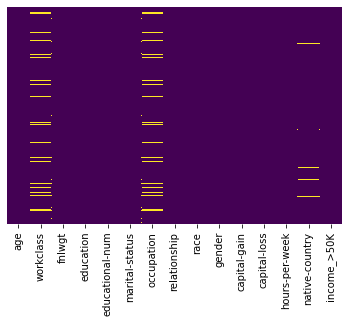

In [23]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [20]:
data['workclass'].value_counts()

Private             30587
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64

In [15]:
data['occupation'].value_counts().index[0]

'Craft-repair'

In [16]:
data['native-country'].value_counts().index[0]

'United-States'

In [27]:
def fill_missing(data, column_name):
    data[column_name].fillna(data[column_name].value_counts().index[0], inplace=True)

In [28]:
fill_missing(data, 'workclass')

In [30]:
fill_missing(data,'occupation')
fill_missing(data,'native-country')

<AxesSubplot:>

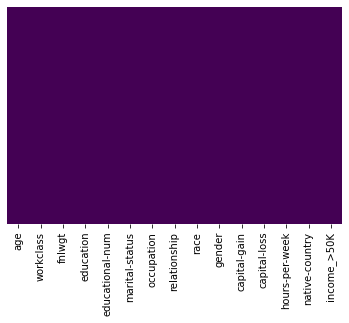

In [31]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [32]:
data.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
age,1.000000,-0.076895,0.034711,0.075839,0.056635,0.070949,0.230988
fnlwgt,-0.076895,1.000000,-0.040696,-0.003357,-0.006303,-0.011642,-0.006852
educational-num,0.034711,-0.040696,1.000000,0.126740,0.081004,0.145670,0.334035
capital-gain,0.075839,-0.003357,0.126740,1.000000,-0.031507,0.082729,0.223325
capital-loss,0.056635,-0.006303,0.081004,-0.031507,1.000000,0.055112,0.145250
hours-per-week,0.070949,-0.011642,0.145670,0.082729,0.055112,1.000000,0.227918
income_>50K,0.230988,-0.006852,0.334035,0.223325,0.145250,0.227918,1.000000


In [33]:
main_df = data.copy()

In [35]:
df_test= pd.read_csv("Data/test.csv")

In [36]:
df1 = pd.concat([data, df_test], axis=0)

In [38]:
df1.shape

(44856, 15)

In [42]:
df1.drop(['fnlwgt','educational-num','capital-gain','capital-loss','marital-status','relationship','race'],axis=1, inplace=True)
    

In [43]:
df1.head()

,age,workclass,education,occupation,gender,hours-per-week,native-country,income_>50K
0,67,Private,Doctorate,Exec-managerial,Male,60,United-States,1.0
1,17,Private,12th,Other-service,Male,15,United-States,0.0
2,31,Private,Bachelors,Exec-managerial,Male,40,United-States,1.0
3,58,State-gov,7th-8th,Transport-moving,Male,40,United-States,0.0
4,25,State-gov,Some-college,Other-service,Male,40,United-States,0.0


In [44]:
columnslst=['workclass','occupation','gender','native-country']

In [46]:
def oneHotencode(data, variablelst):
    temp_df = pd.get_dummies(data, columns=variablelst, drop_first=True)
    return temp_df

In [47]:
temp_df = oneHotencode(df1, columnslst)

In [48]:
temp_df.head()

,age,education,hours-per-week,income_>50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,Doctorate,60,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17,12th,15,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,31,Bachelors,40,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,58,7th-8th,40,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,25,Some-college,40,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [50]:
temp_df['education']= labelencoder.fit_transform(temp_df['education'])

In [51]:
temp_df.head()

,age,education,hours-per-week,income_>50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,10,60,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17,2,15,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,31,9,40,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,58,5,40,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,25,15,40,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [52]:
temp_df.to_csv("featured.csv", index=False)

In [56]:
train_df = temp_df.iloc[:43957,:]
test_df = temp_df.iloc[43957:,:]

In [55]:
data.shape

(43957, 15)

In [62]:
test_df.shape

(899, 64)

In [60]:
test_df.drop(['income_>50K'], inplace=True, axis=1)

C:\Users\Rohit Kumar\.conda\envs\Machine Learning\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:
test_df.to_csv("featured_test.csv", index=False)

In [64]:
train_df.to_csv("featured_train.csv", index=False)

In [66]:
# X_train = train_df.drop(['income_>50K'], inplace=True, axis=1)
# y_train = train_df['income_>50K']

In [67]:
new_train_df= pd.read_csv('featured_train.csv')

In [68]:
X_train = new_train_df.drop(['income_>50K'],  axis=1)
y_train = new_train_df['income_>50K']

In [69]:
X_train.head()

,age,education,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,10,60,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17,2,15,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,31,9,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,58,5,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,25,15,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
y_train.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: income_>50K, dtype: float64

In [71]:
import xgboost as xg 
model = xg.XGBClassifier()

In [72]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
y_pred = model.predict(test_df)

In [75]:
pred= pd.DataFrame(y_pred)
pred.to_csv("predictions_v1.csv")